<a href="https://colab.research.google.com/github/ktripat/HW1_CPSC840/blob/main/Q1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simulate a Nonlinear Function using tensorflow.keras**


In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf 
from matplotlib import pyplot as plt
import seaborn as sns


The nonlinear function considered here : ***f(x)= exp(-x)***. [Exponential Distribution with a waiting parameter lambda =1]

*   Input range of x: (0,10pi) for the training datasets 

Let's show the function using the scatter plot.

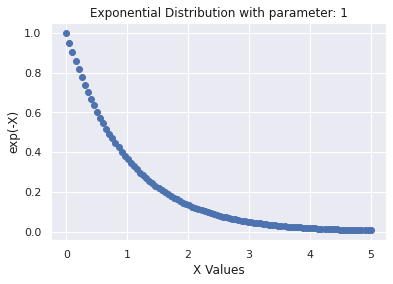

In [21]:
x=np.linspace(0,5,100)
y=np.exp(-x)
plt.scatter(x,y,label='Function')
plt.title('Exponential Distribution with parameter: 1',color='k')
plt.xlabel("X Values",color='k')
plt.ylabel('exp(-X)',color='k')
plt.show()



# **Model #1 Shallow neural network**


*   1 hidden layer with 128 hidden units
*   Activation = ReLU
*   Optimizer = Adam
*   Mean Squared Error (MSE)

Number of epochs = 100


In [22]:
model_shallow=tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(1,)),
                                  tf.keras.layers.Dense(812,activation=tf.nn.relu),
                                  tf.keras.layers.Dropout(0.2),
                                  tf.keras.layers.Dense(1)])
opt=tf.keras.optimizers.Adam(learning_rate=0.02)
model_shallow.compile(optimizer=opt,loss='mse',metrics=['accuracy'])
history_shallow=model_shallow.fit(x,y,epochs=100)


Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 1.6342 - accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.6898 - accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1150 - accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1515 - accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1361 - accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0847 - accuracy: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0779 - accuracy: 0.0000e+00
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0811 - accuracy: 0.0000e+00
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0907 - accuracy: 0.0000e+00
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0621 - accuracy: 

# **Model Summary**

In [23]:
model_shallow.summary() # summary

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 812)               1624      
_________________________________________________________________
dropout_1 (Dropout)          (None, 812)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 813       
Total params: 2,437
Trainable params: 2,437
Non-trainable params: 0
_________________________________________________________________


*Total number of parameters in the neural network = 2437*

---



**Plot** the Figures after the training 

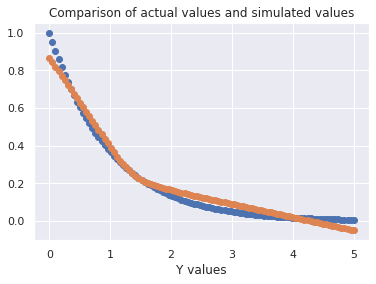

In [24]:
yp=model_shallow.predict(x)  # simulated values
plt.scatter(x,y,label='actual function')             # actual values
plt.scatter(x,yp,label='simulated values')            # simulated values
plt.xlabel("X Values")
plt.xlabel("Y values")
plt.title("Comparison of actual values and simulated values")
plt.show()

Test the model with new data 

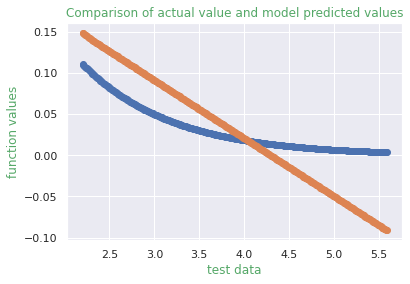

In [25]:
## new testing data
x_test=np.arange(2.2,5.6,0.01)
y_test=model_shallow.predict(x_test)

plt.scatter(x_test,np.exp(-x_test),label='Actual function')
plt.scatter(x_test,y_test,label='Model Predicted')

plt.ylabel('function values',color='g')
plt.xlabel("test data",color='g')
plt.title('Comparison of actual value and model predicted values',color='g')
plt.show()

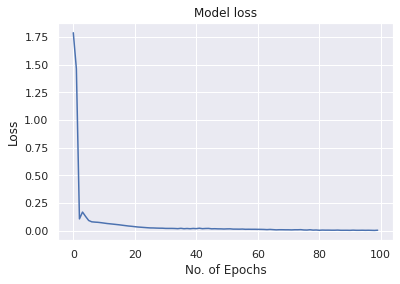

In [27]:
plt.plot(history_shallow.history['loss'])
plt.title('Model loss',color='k')
plt.ylabel('Loss',color='k')
plt.xlabel('No. of Epochs')
plt.show()

**Model #2 Deep neural network (using 3 hidden layers)**






In [28]:
model_deep=tf.keras.models.Sequential([#tf.keras.layers.Flatten(x),
                                  tf.keras.layers.Dense(16,activation=tf.nn.relu),
                                  tf.keras.layers.Dense(24,activation=tf.nn.relu),
                                  tf.keras.layers.Dense(32,activation=tf.nn.relu),
                                  tf.keras.layers.Dense(24,activation=tf.nn.relu),
                                  tf.keras.layers.Dense(16,activation=tf.nn.relu),
                                  tf.keras.layers.Dense(1)])
opt = tf.keras.optimizers.Adam(learning_rate=0.02)
model_deep.compile(optimizer=opt,loss='mse',metrics=['accuracy'])
history_deep=model_deep.fit(x,y,epochs=100)
model_deep.summary()

Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 0.1541 - accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0730 - accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0375 - accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0065 - accuracy: 0.0061
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 0.0092
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 0.0155
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 0.0061
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 6.7077e-04 - accuracy: 0.0155
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 2.1628e-04 - accuracy: 0.0092
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 0.0092
Epoch 11/

1/1 [==============================] - 0s 112ms/step - loss: 2.5905e-17 - accuracy: 0.0000e+00


Text(0, 0.5, 'function values')

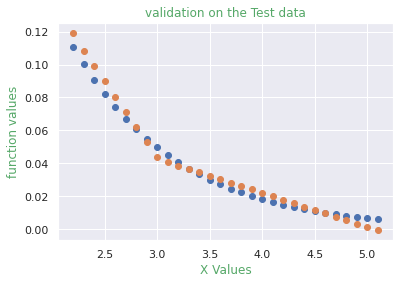

In [29]:
x_test=np.arange(2.2,5.2,0.1)
y_test=model_deep.predict(x_test)
model_deep.evaluate(x_test,y_test)
plt.scatter(x_test,np.exp(-x_test),label='actual Values')
plt.scatter(x_test,y_test,label='model Predicted')
plt.title('validation on the Test data',color='k')
plt.xlabel('X Values',color='k')
plt.ylabel('function values',color='k')


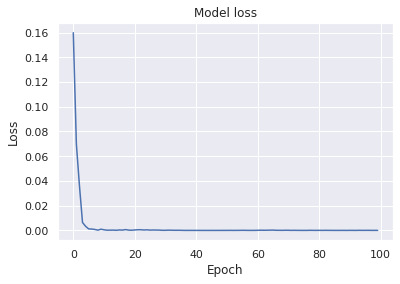

In [30]:
plt.plot(history_deep.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
